## Weight Initialization Experiment
가중치 초기화에 대한 실험 (refer:cs231n lecture slide6)

- 10-layer net with 500 neurons ( $y=WX$ ) on each layer 
- nonlinearity : tanh

In [38]:
#10-D의 unit gaussian input data를 상정합니다.
import numpy as np
data = np.random.randn(1000,500)
hidden_layer_sizes = [500]*10
nonlinearities = ['tanh']*len(hidden_layer_sizes)

In [39]:
act = {'relu' : lambda x:np.maximum(0,x), 'tanh': lambda x:np.tanh(x)}
Hs = {}
for i in range(len(hidden_layer_sizes)):
    X = data if i == 0 else Hs[i-1]
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]
    W = np.random.randn(fan_in, fan_out) * 0.01    # weight initialization
    
    H = np.dot(X,W) # matrix multiplication
    H = act[nonlinearities[i]](H) # non liearlity
    Hs[i] = H  #cache results on this layer

In [40]:
# 각 레이어의 분포를 살펴봅니다.
print ('input layer의 평균 : %f and std : %f'%(np.mean(data),np.std(data)))
layer_means = [np.mean(H) for i,H in Hs.items()]
layer_stds = [np.std(H) for i,H in Hs.items()]
for i,H in Hs.items():
    print('hidden layer %d 평균 : %f and std : %f'% (i+1, layer_means[i], layer_stds[i]))


input layer의 평균 : -0.001033 and std : 1.001287
hidden layer 1 평균 : -0.000086 and std : 0.213724
hidden layer 2 평균 : -0.000072 and std : 0.047743
hidden layer 3 평균 : 0.000003 and std : 0.010681
hidden layer 4 평균 : -0.000007 and std : 0.002390
hidden layer 5 평균 : 0.000001 and std : 0.000534
hidden layer 6 평균 : 0.000000 and std : 0.000119
hidden layer 7 평균 : -0.000000 and std : 0.000027
hidden layer 8 평균 : -0.000000 and std : 0.000006
hidden layer 9 평균 : 0.000000 and std : 0.000001
hidden layer 10 평균 : 0.000000 and std : 0.000000


In [67]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

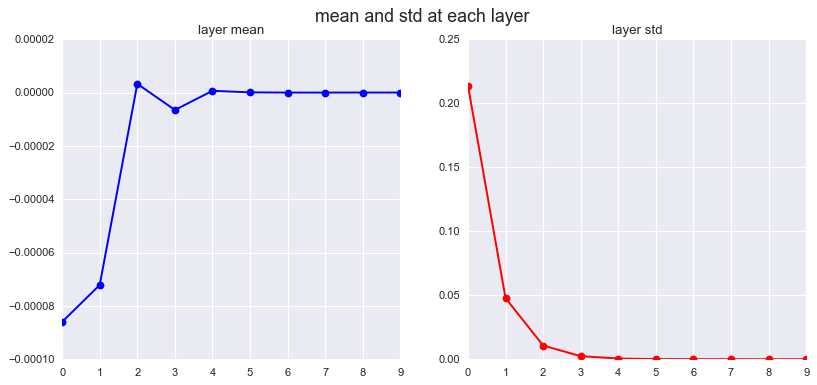

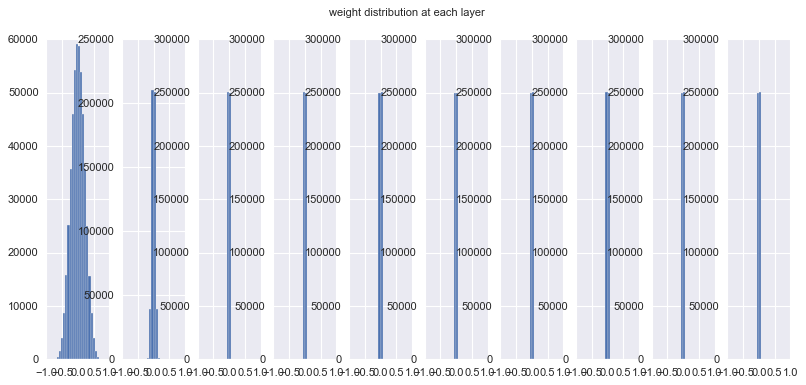

In [83]:
# 평균과 std를 시각화합니다.
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8') #plt.style.available


plt.figure(figsize = (12,5))
plt.suptitle("mean and std at each layer", fontsize=16)

plt.subplot(1,2,1)
plt.plot(Hs.keys(), layer_means, 'ob-')
plt.title('layer mean')
plt.xticks(range(0,10,1))
plt.subplot(122)
plt.plot(Hs.keys(), layer_stds, 'or-')
plt.xticks(range(0,10,1))
plt.title('layer std')
plt.gca().ticklabel_format(style='scientific', axis='y')



#raw distribution 분포를 시각화합니다.
plt.figure(figsize= (12,5))
plt.suptitle("weight distribution at each layer")
for i,H in Hs.items():
    plt.subplot(1,len(Hs), i+1)
    plt.hist(H.ravel(), 30, range=(-1,1))  # x, bins, range
